In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

def read_data(file_name: str) -> pd.DataFrame:
    """
    Read interval data from a file (BED file) and return a DataFrame.

    Args:
        file_name (str): The name of the file to read data from.

    Returns:
        pd.DataFrame: A DataFrame containing the interval data with columns 'ID', 'start', and 'end'.
    """
    records: List[Tuple[str, int, int]] = []
    with open(file_name, 'r') as file:
        for line in file:
            parts = line.strip().split()
            id = parts[0]
            start = int(parts[1])
            end = int(parts[2])
            records.append((id, start, end))
    return pd.DataFrame(records, columns=['ID', 'start', 'end'])


def plot_intervals(df: pd.DataFrame, color: str, segment_lengths: Dict[str, int]) -> None:
    """
    Plot intervals on segments and save the figure.

    Args:
        df (pd.DataFrame): DataFrame containing interval data with columns 'ID', 'start', and 'end'.
        color (str): Color to use for plotting the intervals.
        segment_lengths (Dict[str, int]): Dictionary with segment IDs as keys and their lengths as values.

    Returns:
        None
    """

    plt.clf()  # Clear the current figure

    plt.figure(figsize=(14, 8))

    # Iterate through unique IDs
    for idx, (ID, length) in enumerate(segment_lengths.items()):
        # Filter data for the current ID
        data = df[df['ID'] == ID]
        
        # Plot the main segment line
        plt.plot([0, length], [idx, idx], color='gray', alpha=0.5, linewidth=5)
        
        # Plot each interval
        for _, row in data.iterrows():
            plt.plot([row['start'], row['end']], [idx, idx], color=color, linewidth=2)
            
        # Add text label
        plt.text(length + 20000, idx, ID, verticalalignment='center')

    # Set plot parameters
    plt.xlabel('Position')
    plt.ylabel('Chromosome')
    plt.title('Repeted region on Chromosomes')
    plt.yticks(range(len(segment_lengths)), segment_lengths.keys())
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the figure
    plt.show()

# Dictionary of maximum x-axis limits for each ID
segment_lengths = {
    'ref|NC_001133|': 230218,
    'ref|NC_001134|': 813184,
    'ref|NC_001135|': 316620,
    'ref|NC_001136|': 1531933,
    'ref|NC_001137|': 576874,
    'ref|NC_001138|': 270161,
    'ref|NC_001139|': 1090940,
    'ref|NC_001140|': 562643,
    'ref|NC_001141|': 439888,
    'ref|NC_001142|': 745751,
    'ref|NC_001143|': 666816,
    'ref|NC_001144|': 1078177,
    'ref|NC_001145|': 924431,
    'ref|NC_001146|': 784333,
    'ref|NC_001147|': 1091291,
    'ref|NC_001148|': 948066,
    'ref|NC_001224|': 85779,
}

total_length = sum(segment_lengths.values())

Proportion of repeated regions from RepeatMasker: 1.2666337915153318 %


<Figure size 640x480 with 0 Axes>

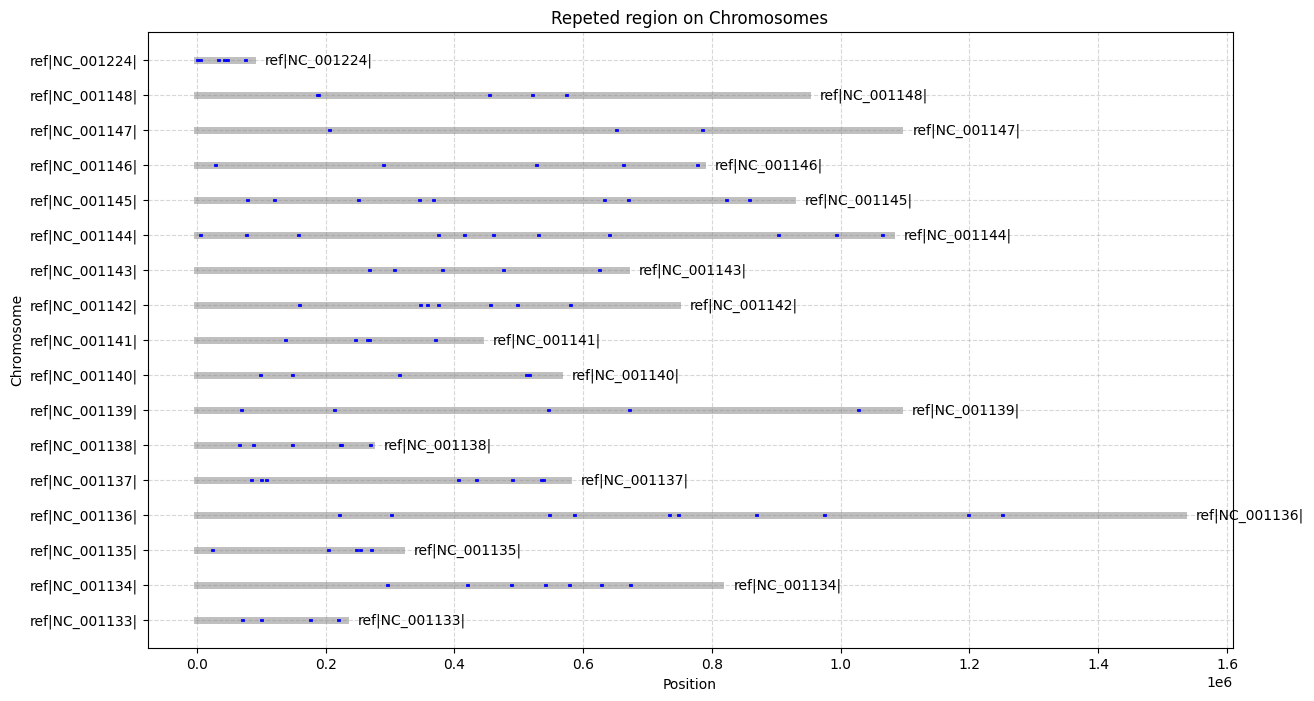

In [3]:
file_name = 'init_files/repeated_regions_RM.bed'
df = read_data(file_name)

# How much the rep regions represent compared to whole genome 
df['interval'] = df['end'] - df['start']
rep_prop_RM = (sum(df['interval']) / total_length) * 100
print(f"Proportion of repeated regions from RepeatMasker:", rep_prop_RM, "%")

# Plot the rep regions on each chromosome 
plot_intervals(df, 'blue', segment_lengths)

Proportion of repeated regions from Jubin: 7.682305943725912 %


<Figure size 640x480 with 0 Axes>

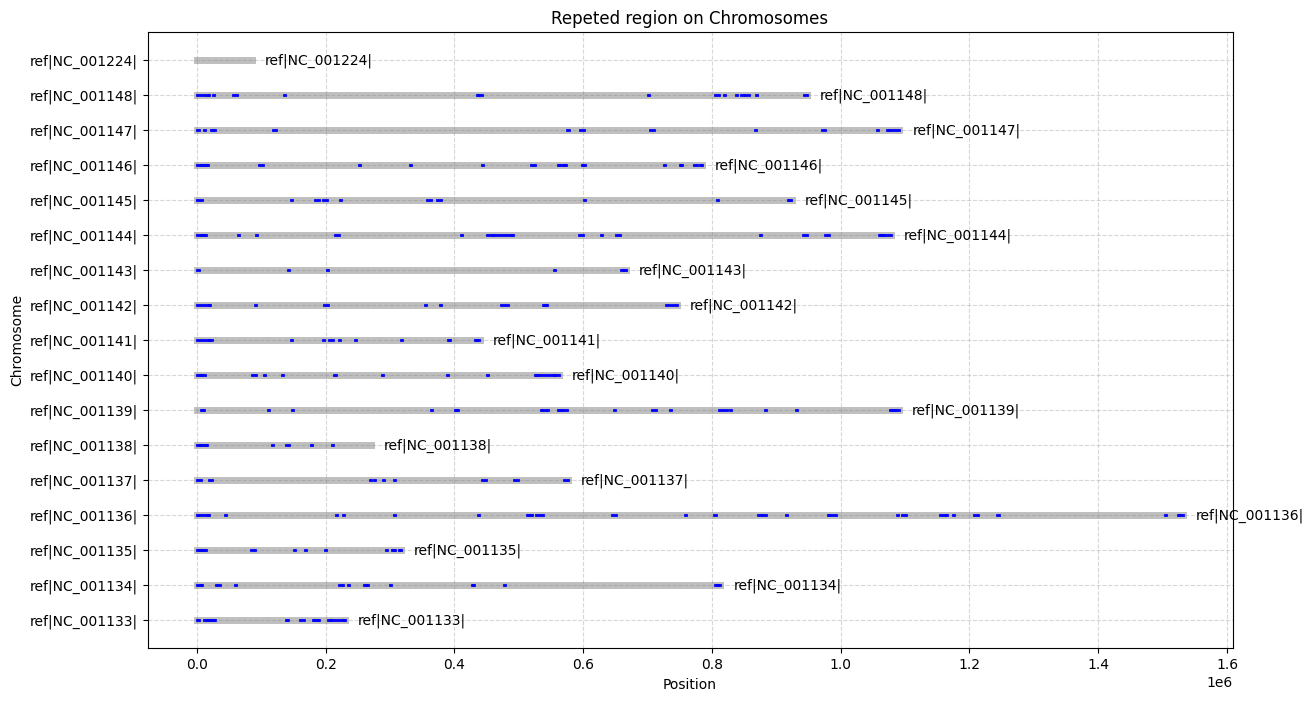

In [4]:
file_name = 'init_files/repeated_regions_Jubin.bed'
df = read_data(file_name)

# How much the rep regions represent compared to whole genome 
df['interval'] = df['end'] - df['start']
rep_prop_J = (sum(df['interval']) / total_length) * 100
print(f"Proportion of repeated regions from Jubin:", rep_prop_J, "%")

# Plot the rep regions on each chromosome 
plot_intervals(df, 'blue', segment_lengths)

Proportion of repeated regions from merged files: 8.884796174747194 %


<Figure size 640x480 with 0 Axes>

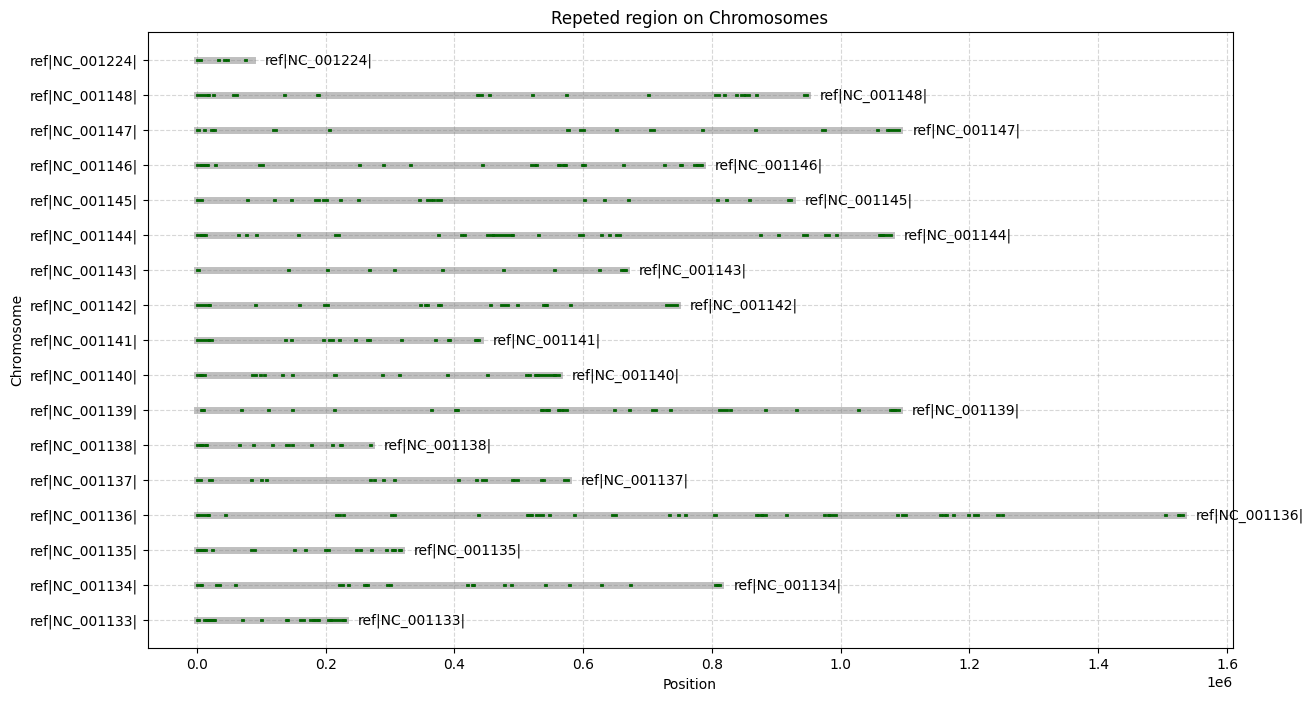

In [24]:
file_name = 'rep_regions_Scere.bed'
df = read_data(file_name)

# How much the rep regions represent compared to whole genome 
df['interval'] = df['end'] - df['start']
rep_prop_merged = (sum(df['interval']) / total_length) * 100
print(f"Proportion of repeated regions from merged files:", rep_prop_merged, "%")

# Plot the rep regions on each chromosome 
plot_intervals(df, 'darkgreen', segment_lengths)

In [8]:
df['interval'] = df['end'] - df['start']
sum(df['interval'])

1132621